# Clustering Tutorial

This notebook is adapted from an [ipython notebook](https://github.com/theislab/single-cell-tutorial) provided by the Theis Lab as part of their Molecular Systems Biology submission "Current best practices in single‐cell RNA‐seq analysis: a tutorial" ([Luecken and Theis, 2019](https://doi.org/10.15252/msb.20188746)).

# Table of Contents

* [1 Setting Up the Environment](#Setting-Up-the-Environment)
* [2 Reading in the Data](#Reading-in-the-Data)
* [3 Clustering](#Clustering)

# 1 Setting Up the Environment

In [1]:
# main scRNA-seq analysis toolkit
import scanpy as sc

# data science tools
import numpy as np
import scipy as sp
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb

# handles warnings; we are importing this to actually suppress some annoyting warning messages downstream
import warnings

# operating system interface
import os

In [2]:
plt.rcParams['figure.figsize']=(2,2) # rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(dpi=200, dpi_save=300, format='ps') # scanpy figure parameters
#sc.logging.print_versions() # prints out version info for modules/packages/libraries used in the notebook. Important for reproducibility! 

In [3]:
# Files and Directories
sc.settings.figdir = '../figures/'
results = './results/Ascl1_Polylox_W2798.h5ad'

In [4]:
# Define a color map for combined marker expression
colors2p = plt.cm.Purples(np.linspace(0, 1, 128))
colors3p = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsCombp = np.vstack([colors3p, colors2p])
mymap_purple = colors.LinearSegmentedColormap.from_list('purple_colormap', colorsCombp)

# Define a color map for individual gene expression
colors2r = plt.cm.Greens(np.linspace(0, 1, 128))
colors3r = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsCombr = np.vstack([colors3r, colors2r])
mymap_green = colors.LinearSegmentedColormap.from_list('green_colormap', colorsCombr)

# 2 Reading in the Data

In [5]:
# load in saved adata object
adata = sc.read(results)

In [6]:
adata

AnnData object with n_obs × n_vars = 8648 × 18074
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# 3 Clustering

In [7]:
# Perform clustering using highly variable genes. Default resolution = 1.0 (r1).
sc.tl.leiden(adata, resolution=1.0, key_added='leiden_r1.0')

running Leiden clustering
    finished: found 20 clusters and added
    'leiden_r1.0', the cluster labels (adata.obs, categorical) (0:00:01)


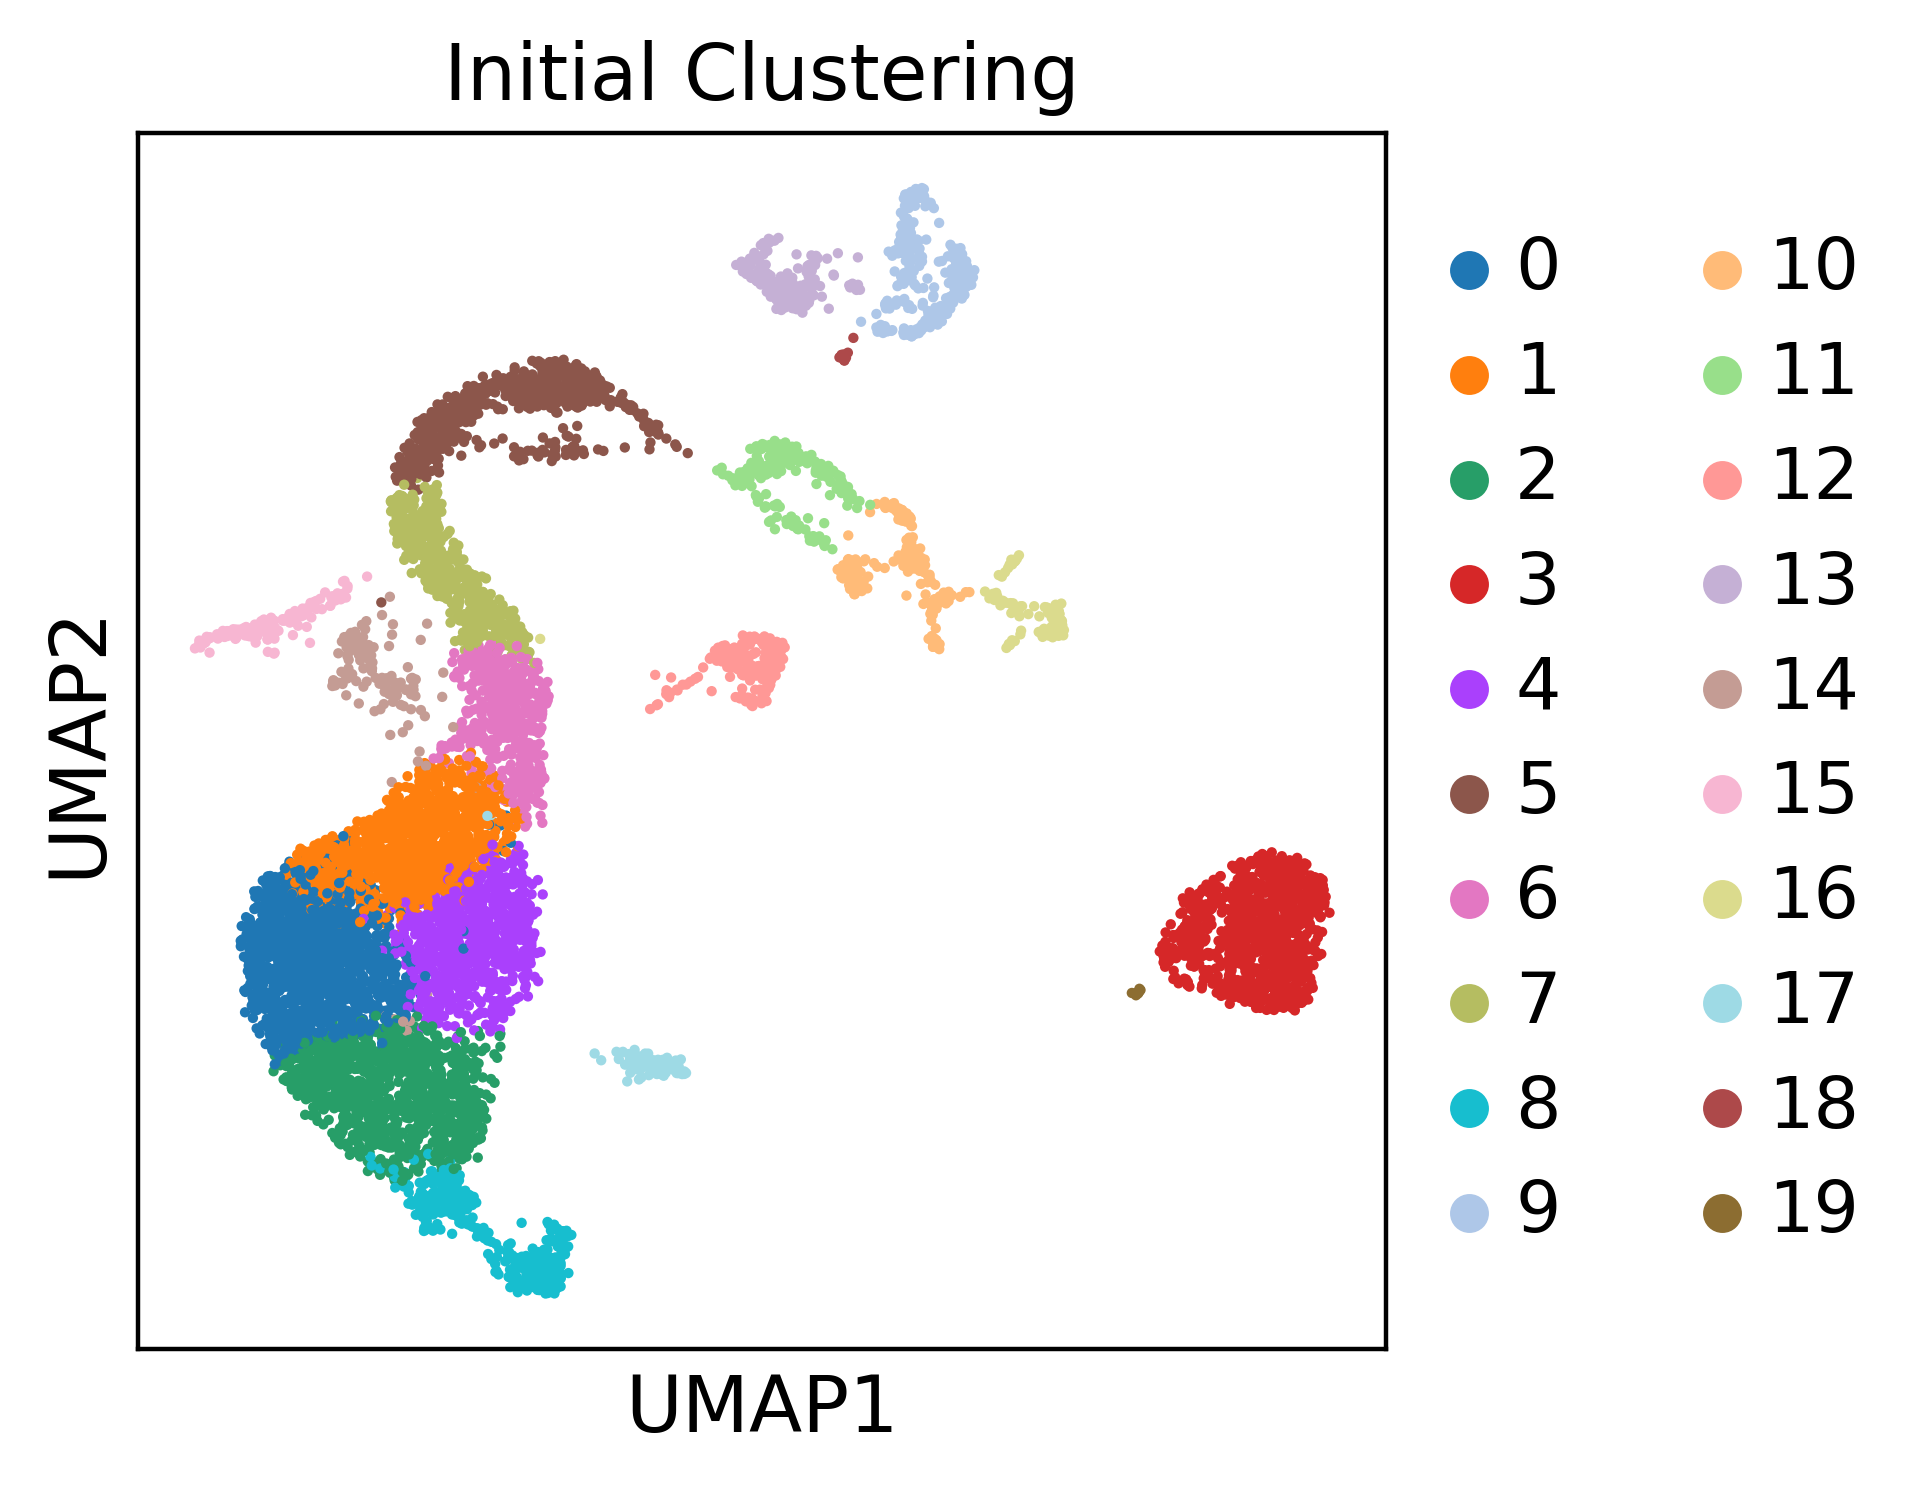

In [8]:
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['leiden_r1.0'], title=['Initial Clustering'])

### Cell-Cluster Distribution

In [9]:
# Total cells per cluster
counts_df = pd.DataFrame([adata.obs['leiden_r1.0'].value_counts()])
counts_df = counts_df.rename(index = {'leiden_r1.0': 'Total'})
counts_df = counts_df.T
counts_df

,Total
0,1338
1,1124
2,1056
3,908
4,853
5,597
6,477
7,474
8,344
9,270


### Identifying Marker Genes

To begin annotating our clusters, we first find genes that are up-regulated in each cluster compared to all other clusters. These are our marker genes. All genes are taken into account, as any gene may be an informative marker. Here we identify and return the top 20 marker genes for each cluster.

In [10]:
# Calculate marker genes
sc.tl.rank_genes_groups(adata, groupby='leiden_r1.0', key_added='rank_genes_all', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_all']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:16)


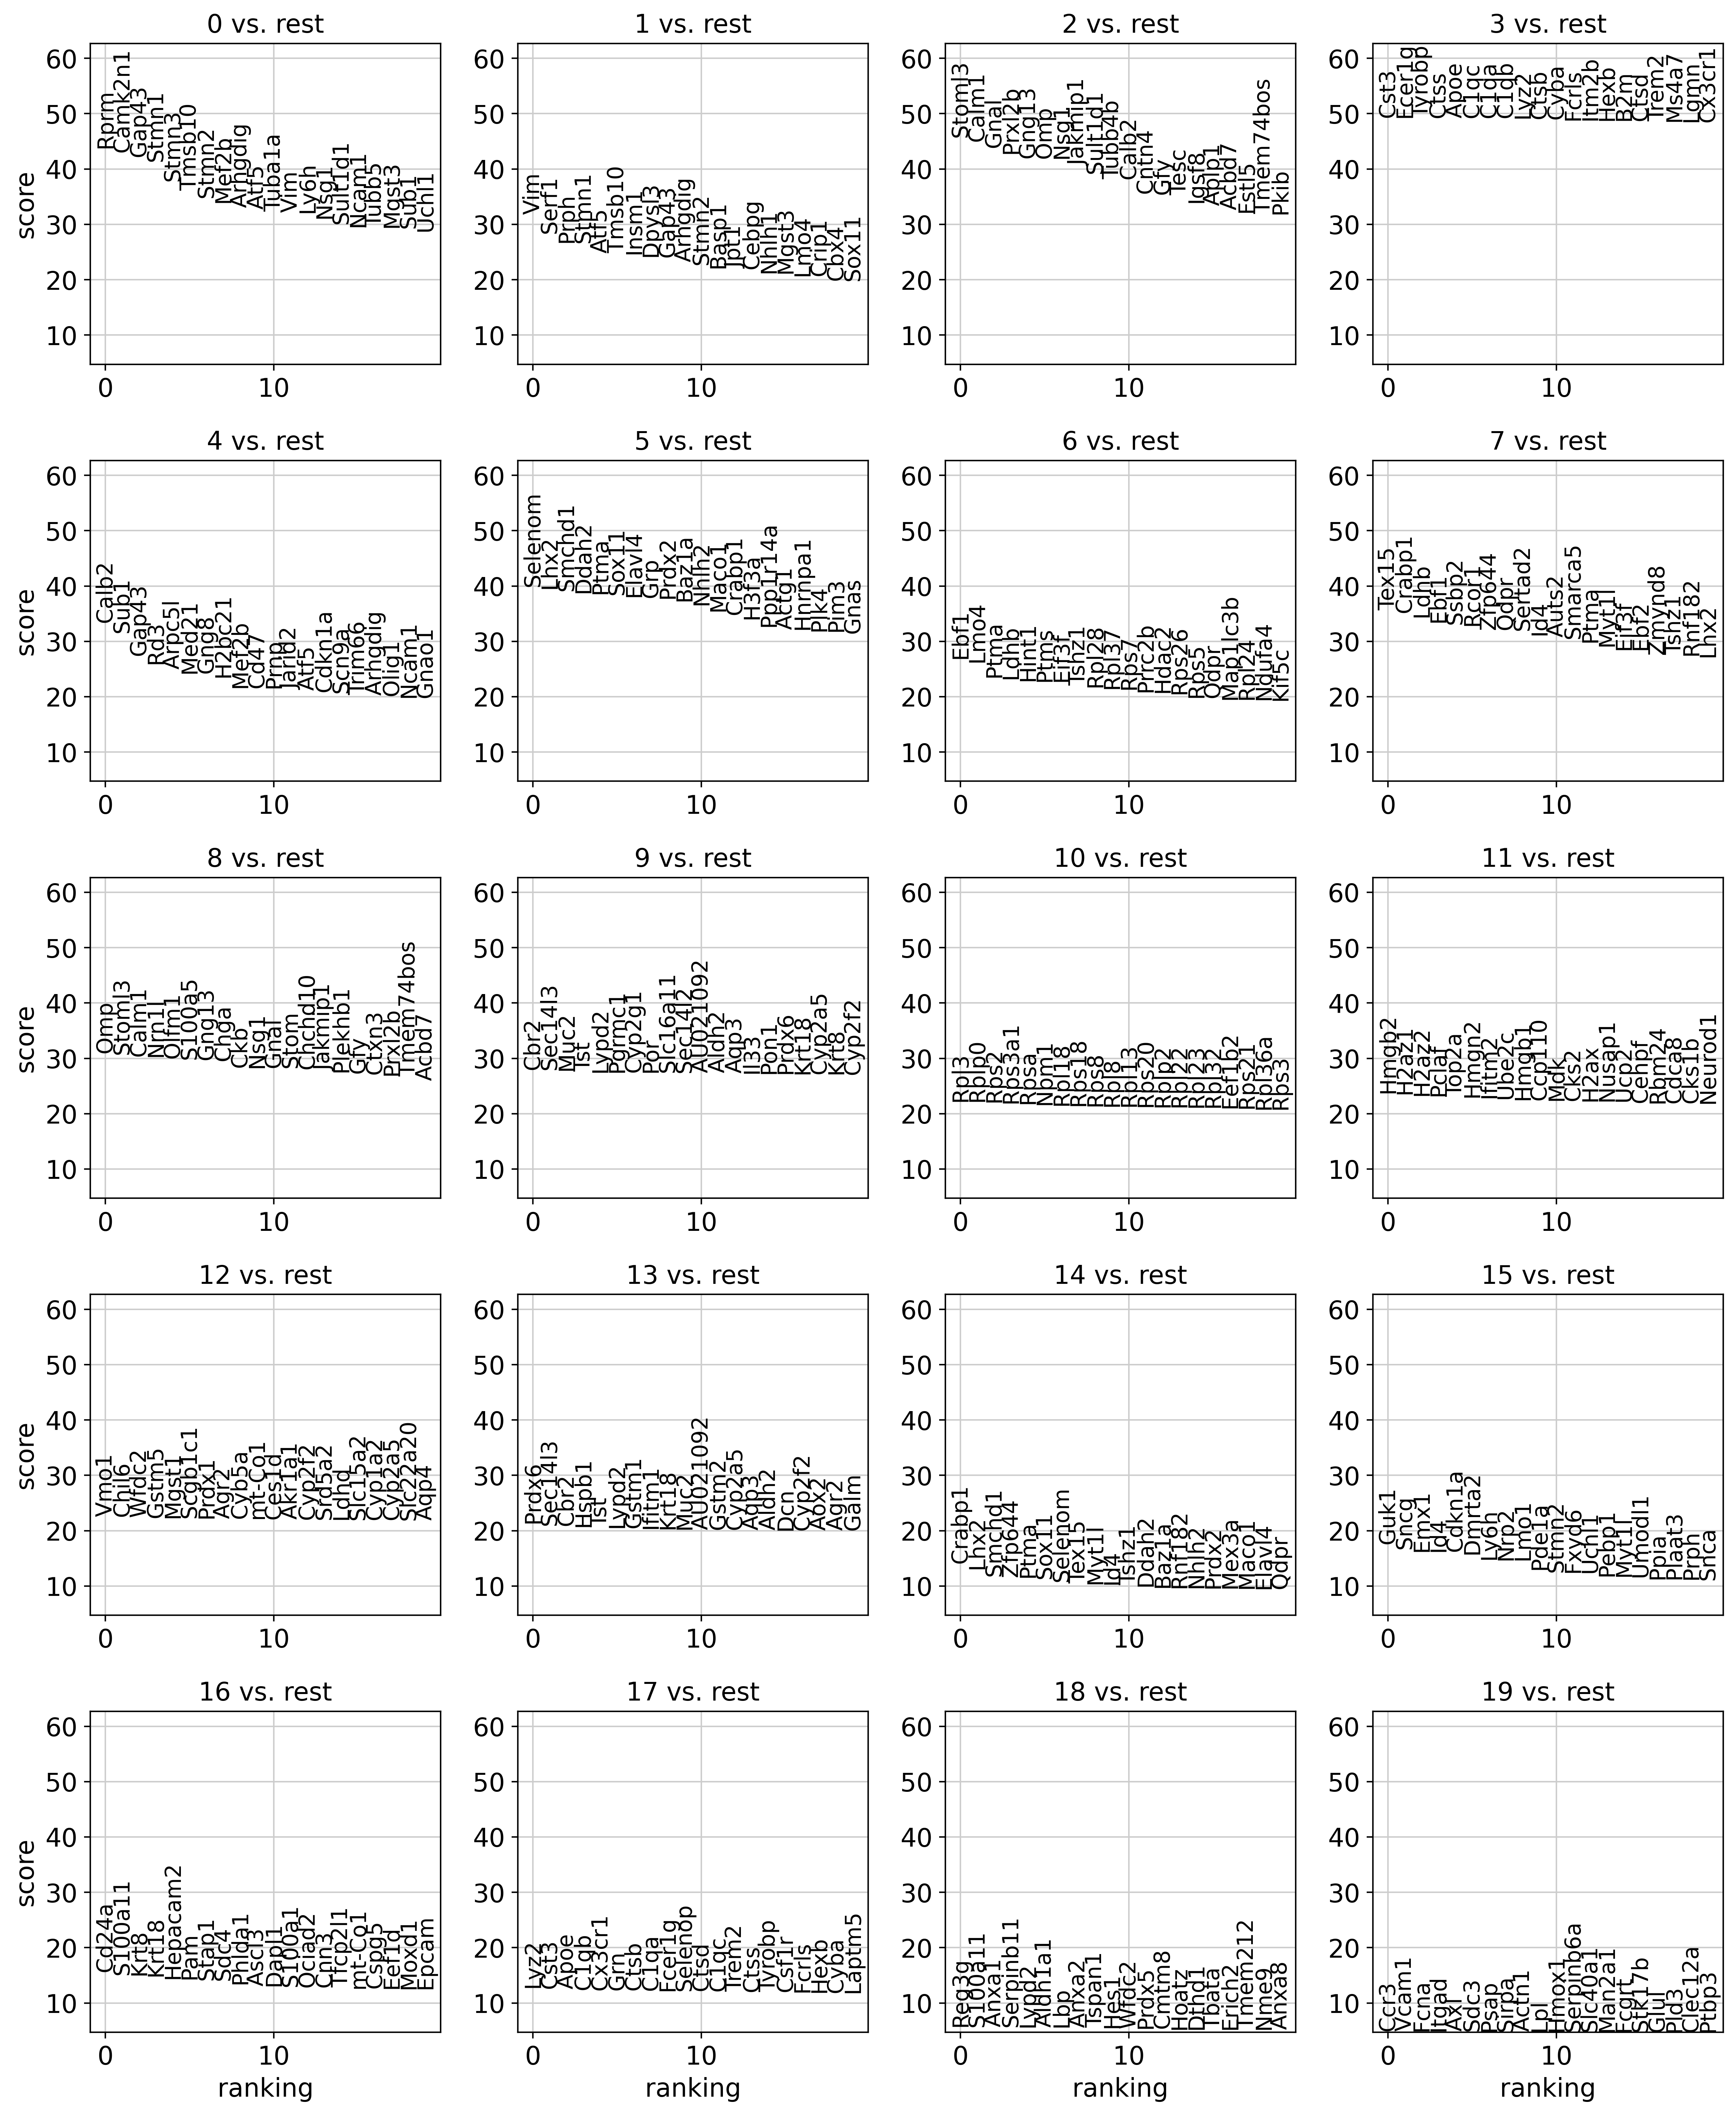

In [11]:
# Plot marker genes
sc.pl.rank_genes_groups(adata, 
                        key = 'rank_genes_all', 
                        groups = ['0', '1', '2', '3', '4', '5', '6', '7', '8',
                                  '9', '10', '11', '12', '13', '14', '15', '16',
                                  '17', '18', '19'], 
                        fontsize = 12)